In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

In [10]:
# reading data
data = pd.read_csv('gbm-data.csv')

In [11]:
# extracting features and target
target = data['Activity']
features = data.drop('Activity', axis=1)
features_n = features.values

In [13]:
# data split
features_train, features_test, target_train, target_test = \
    train_test_split(features_n, target, test_size=0.8, random_state=241)

In [94]:
# fit models with different learning rates
learning_rate = [1, 0.5, 0.3, 0.2, 0.1]
val_array_train = []
val_array_test = []
for l_rate in learning_rate:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=l_rate)
    clf.fit(features_train, target_train)
    gen_train = clf.staged_decision_function(features_train)
    gen_test = clf.staged_decision_function(features_test)
    val_train = [val for val in gen_train]
    val_test = [val for val in gen_test]
    # transform to probs
    val_train = 1 / (1 + np.exp(np.negative(val_train)))
    shp = np.shape(val_train)
    val_train = np.reshape(val_train, (shp[0], shp[1]))
    val_test = 1 / (1 + np.exp(np.negative(val_test)))
    shp = np.shape(val_test)
    val_test = np.reshape(val_test, (shp[0], shp[1]))
    val_array_train.append(val_train)
    val_array_test.append(val_test)

      Iter       Train Loss   Remaining Time 
         1           1.0190           24.94s
         2           0.9192           21.84s
         3           0.8272           20.66s
         4           0.7834           18.47s
         5           0.7109           17.46s
         6           0.6368           17.46s
         7           0.5797           17.15s
         8           0.5610           16.34s
         9           0.5185           15.89s
        10           0.4984           15.32s
        20           0.1999           15.10s
        30           0.1313           13.76s
        40           0.0790           12.57s
        50           0.0511           11.71s
        60           0.0352           10.95s
        70           0.0245           10.22s
        80           0.0162            9.55s
        90           0.0114            8.90s
       100           0.0077            8.41s
       200           0.0004            2.42s
      Iter       Train Loss   Remaining Time 
        

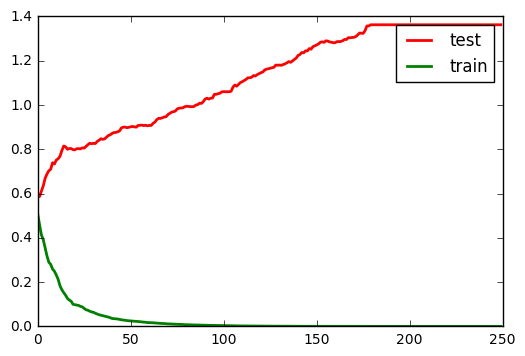

In [101]:
# graphs of log-loss for every learning rate
# learning rate = 1.0
train_loss_1 = []
for iteration in val_array_train[0]:
    train_loss_1.append(log_loss(target_train, iteration))
test_loss_1 = []
for iteration in val_array_test[0]:
    test_loss_1.append(log_loss(target_test, iteration))
%matplotlib inline
plt.figure()
plt.plot(test_loss_1, 'r', linewidth=2)
plt.plot(train_loss_1, 'g', linewidth=2)
plt.legend(['test', 'train'])

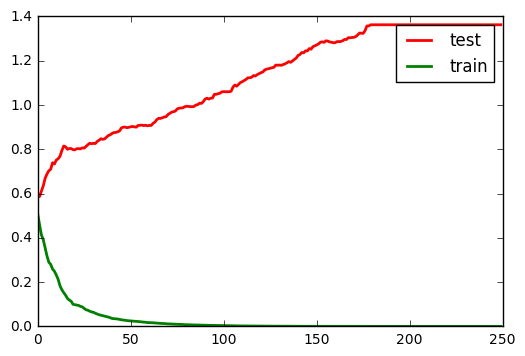

In [102]:
# learning rate = 0.5
train_loss_05 = []
for iteration in val_array_train[1]:
    train_loss_05.append(log_loss(target_train, iteration))
test_loss_05 = []
for iteration in val_array_test[1]:
    test_loss_05.append(log_loss(target_test, iteration))
%matplotlib inline
plt.figure()
plt.plot(test_loss_1, 'r', linewidth=2)
plt.plot(train_loss_1, 'g', linewidth=2)
plt.legend(['test', 'train'])

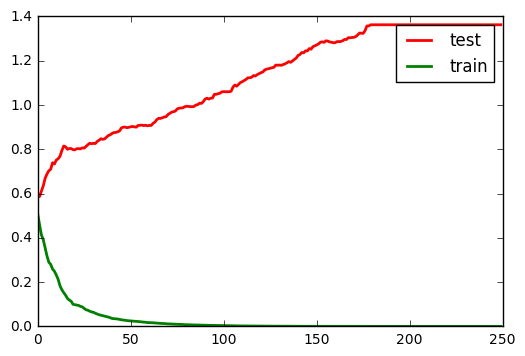

In [103]:
# learning rate = 0.3
train_loss_03 = []
for iteration in val_array_train[2]:
    train_loss_03.append(log_loss(target_train, iteration))
test_loss_03 = []
for iteration in val_array_test[2]:
    test_loss_03.append(log_loss(target_test, iteration))
%matplotlib inline
plt.figure()
plt.plot(test_loss_1, 'r', linewidth=2)
plt.plot(train_loss_1, 'g', linewidth=2)
plt.legend(['test', 'train'])

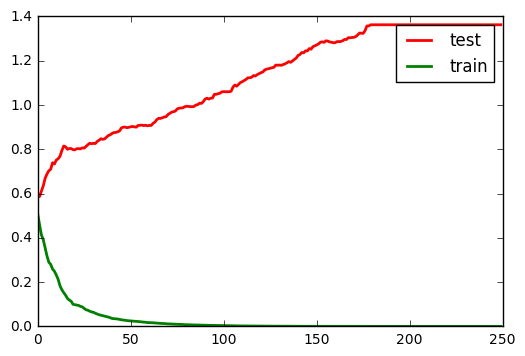

In [104]:
# learning rate = 0.2
train_loss_02 = []
for iteration in val_array_train[3]:
    train_loss_02.append(log_loss(target_train, iteration))
test_loss_02 = []
for iteration in val_array_test[3]:
    test_loss_02.append(log_loss(target_test, iteration))
%matplotlib inline
plt.figure()
plt.plot(test_loss_1, 'r', linewidth=2)
plt.plot(train_loss_1, 'g', linewidth=2)
plt.legend(['test', 'train'])

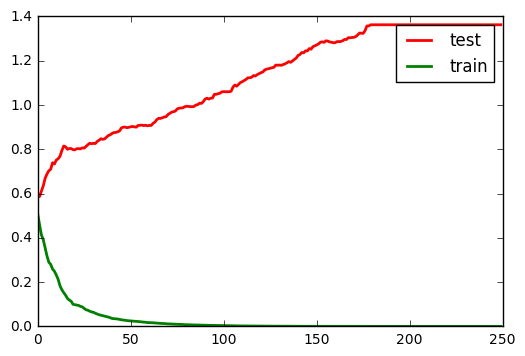

In [105]:
# learning rate = 0.1
train_loss_01 = []
for iteration in val_array_train[4]:
    train_loss_01.append(log_loss(target_train, iteration))
test_loss_01 = []
for iteration in val_array_test[4]:
    test_loss_01.append(log_loss(target_test, iteration))
%matplotlib inline
plt.figure()
plt.plot(test_loss_1, 'r', linewidth=2)
plt.plot(train_loss_1, 'g', linewidth=2)
plt.legend(['test', 'train'])

Result - overfitting (answer for 1st question)

In [107]:
# answer for 2nd question
value = np.min(test_loss_02)
min_index = np.argmin(test_loss_02)
print(value, min_index)

0.531450796319 36


In [108]:
# answer for 3rd question
clf_forest = RandomForestClassifier(n_estimators=min_index, random_state=241)
clf_forest.fit(features_train, target_train)
y_pred = clf.predict_proba(features_test)
forest_logloss = log_loss(target_test, y_pred)
print(forest_logloss)

0.56721664466


idk why, but the right answer is 0.56 instead of 0.57